#Exercício Unsupervised Learning
Aluno João Paulo Barbosa


# 1 - Clustering

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import datasets
import seaborn as sns
%matplotlib inline

In [2]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811685 sha256=ec01eb06e4ae5f5885a58ce9387ed486d95c6fb9ff47daa7f2d03e0fd5303d4b
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [3]:
import surprise

In [4]:
df = pd.read_csv('segmentation data.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [8]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

transformando a variável 'Gender' em uma variável numérica

In [9]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

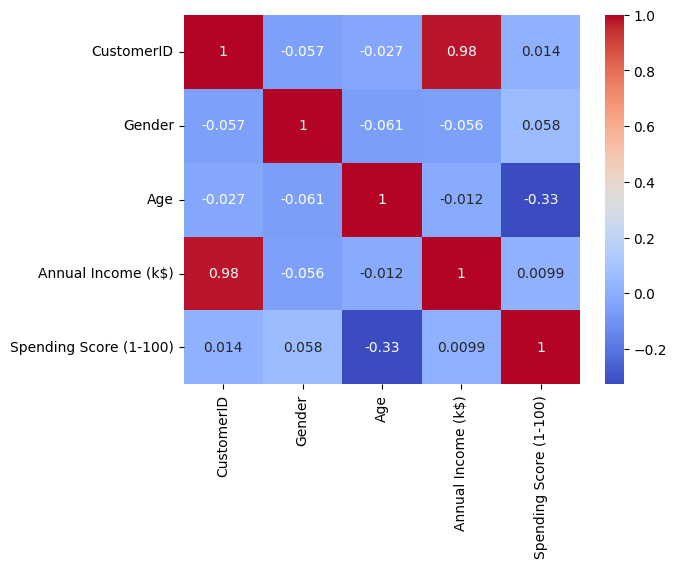

In [10]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Analisando a matriz de correlações não identificamos correlações que se ressaltem entre as variáveis, a relação entre elas parece ser similar, sem muitas variações. A única correlação significativa inclui a variável CustomerID, a qual é aleatória, portanto não agrega aprendizagem ao modelo.

Vamos agora selecionar as variáveis significativas para análise, assim vamos excluir somente a variável gender ID.

In [11]:
 X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Aplicação do modelo K-means

 Agora vamos analisar o número ideal de klusters, utilizando o método do cotovelo e o coeficiente de silhueta

In [12]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

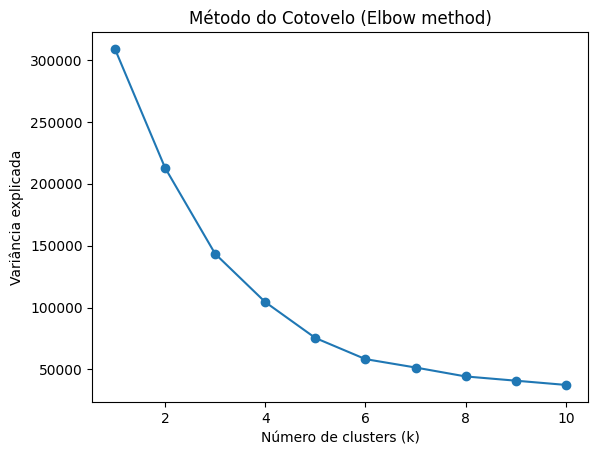

In [13]:
# Lista para armazenar os valores de variância explicada
inertia = []

# Testar diferentes valores de k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico da variância explicada em função do número de clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Variância explicada')
plt.title('Método do Cotovelo (Elbow method)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

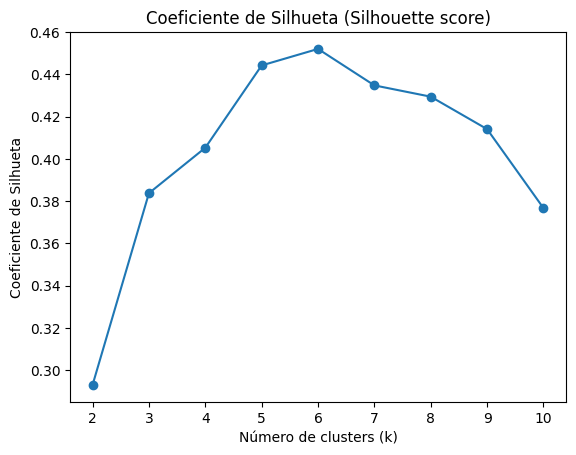

In [14]:
from sklearn.metrics import silhouette_score

# Lista para armazenar os valores de coeficiente de silhueta
silhouette_scores = []

# Testar diferentes valores de k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plotar o gráfico do coeficiente de silhueta em função do número de clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Coeficiente de Silhueta (Silhouette score)')
plt.show()

Segundo o método de Elbow o número ideal seria entre 5 e 6, ja segundo o coeficiente de silhueta, o número ideal seria 6. Por isso iremos utilizar 6 clusters na aplicação do modelo K-means.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


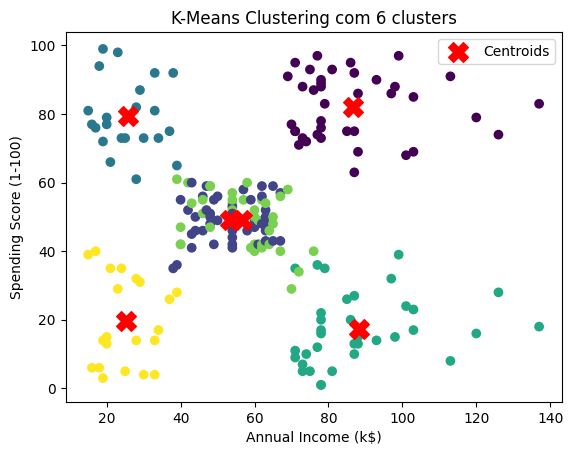

O coeficiente de silhueta é: 0.45205475380756527


In [15]:
# Definir o número de clusters
k = 6

# Criar o modelo K-Means
kmeans = KMeans(n_clusters=k, random_state=42)

# Treinar o modelo com os dados
kmeans.fit(X)

# Obter os rótulos dos clusters para cada ponto de dados
labels = kmeans.labels_

# Obter as coordenadas dos centros dos clusters
cluster_centers = kmeans.cluster_centers_

# Visualizar os clusters em um scatter plot
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 2], cluster_centers[:, 3], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('K-Means Clustering com 6 clusters')
plt.show()

# Calcular o coeficiente de silhueta para avaliar a qualidade do clustering
silhouette_avg = silhouette_score(X, labels)
print(f'O coeficiente de silhueta é: {silhouette_avg}')


Parece haver pelo menos um cluster sobreposto, vamos refazer o modelo utilizando agora 5 clusters. E tentar analisar visulamente todas as variáveis utilizando o método Pair Plot.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


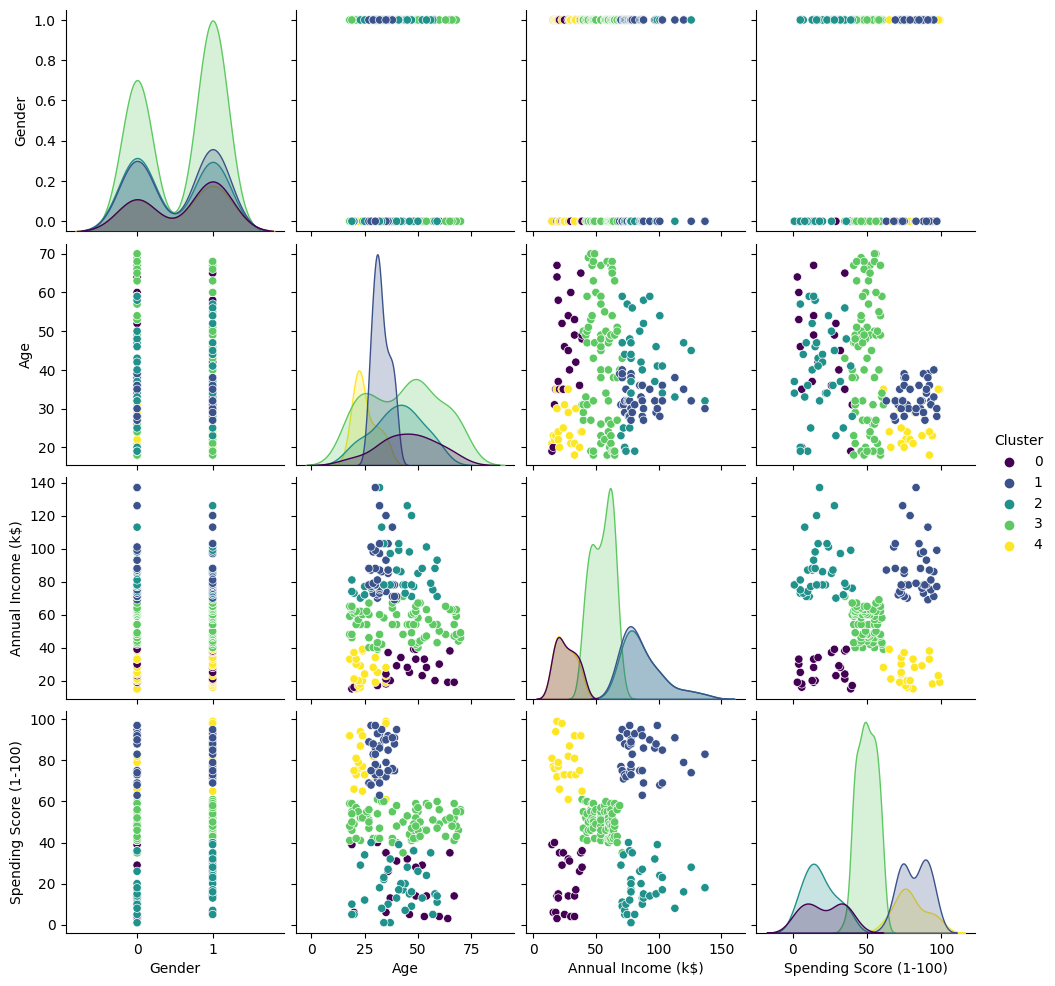

O coeficiente de silhueta é: 0.44424291275274114


In [16]:
# Definir o número de clusters
k = 5

# Criar o modelo K-Means
kmeans = KMeans(n_clusters=k, random_state=42)

# Treinar o modelo com os dados
kmeans.fit(X)

# Obter os rótulos dos clusters para cada ponto de dados
labels = kmeans.labels_

# Adicionar os rótulos dos clusters ao DataFrame
df['Cluster'] = labels

# Pair Plot para visualizar os clusters em relação a todas as variáveis
sns.pairplot(df, hue='Cluster', palette='viridis', vars=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

# Calcular o coeficiente de silhueta para avaliar a qualidade do clustering
silhouette_avg = silhouette_score(X, labels)
print(f'O coeficiente de silhueta é: {silhouette_avg}')

É perceptível que utilizando este modelo, os clusters são bem definidos somente quando cruzamos as variáveis "annual income" e "Spending Score", o que demonstra que ambas possuem uma alta correlação, até pela natureza destes indicadores. Os demais cruzamentos não apresentam clusters bem definidos, com alta sobreposição entre eles. O cluster que apresenta maior distinção entre os demais é o cluster três, por isso vamos analisá-lo um pouco mais em detalhes adiante.

Vamos agora responder às questões propostas, segundo os resultados da aplicação do modelo K-means

Número de perfis de clientes.

Foram definidos 5 perfis de clientes, chegamos a este número após utilizar 6 perfis e percebermos uma clara sobreposição.

Perfis de clientes minoritários e majoritários:
Podemos identificar os clusters com menos e mais clientes e comparar suas características para determinar os perfis minoritários e majoritários.

In [21]:
# Contagem de clientes em cada cluster
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

# Cluster com o menor número de clientes (perfil minoritário)
minority_cluster = cluster_counts.idxmin()

# Cluster com o maior número de clientes (perfil majoritário)
majority_cluster = cluster_counts.idxmax()

print(f"Minority customer profile is Cluster {minority_cluster}")
print(f"Majority customer profile is Cluster {majority_cluster}")

3    79
1    39
2    37
0    23
4    22
Name: Cluster, dtype: int64
Minority customer profile is Cluster 4
Majority customer profile is Cluster 3


Como esperado o grupo que menos se sobrepõe aos demais e que tem maior número de clientes, é o grupo 3, por isso é o grupo que pode embasar ações de marketing e engajamento.

Principais características dos clientes:
Podemos calcular a média de cada variável numérica dentro de cada cluster para obter as principais características dos clientes em cada grupo

In [19]:
# Calculando a média das características para cada cluster
cluster_means = df.groupby('Cluster').mean()

# Exibindo as principais características dos clientes em cada cluster
print("Main characteristics of customers:")
print(cluster_means)

Main characteristics of customers:
         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         23.000000  0.608696  45.217391           26.304348   
1        162.000000  0.538462  32.692308           86.538462   
2        162.945946  0.486486  40.324324           87.432432   
3         85.012658  0.582278  43.126582           54.822785   
4         23.090909  0.590909  25.272727           25.727273   

         Spending Score (1-100)  
Cluster                          
0                     20.913043  
1                     82.128205  
2                     18.189189  
3                     49.835443  
4                     79.363636  


Em resumo podemos utilizar as informações da média dos indicadores do grupo 3 para estabelecer alguma estratégia direcionada a este grupo.Entretanto as principais informações que podemos considerar são a média do 'annual income' e a média do 'spending score'.

# Aplicação do modelo DBSCAN

In [22]:
# Importar o DBSCAN
from sklearn.cluster import DBSCAN

# Definir o modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Treinar o modelo com os dados
dbscan.fit(X)

# Obter os rótulos dos clusters para cada ponto de dados
labels_dbscan = dbscan.labels_

# Adicionar os rótulos dos clusters ao DataFrame
df['DBSCAN_Cluster'] = labels_dbscan

# Contagem de clientes em cada cluster do DBSCAN
dbscan_cluster_counts = df['DBSCAN_Cluster'].value_counts()

# Exibir a quantidade de amostras em cada cluster do DBSCAN
print("DBSCAN cluster counts:")
print(dbscan_cluster_counts)


DBSCAN cluster counts:
-1    200
Name: DBSCAN_Cluster, dtype: int64


Com estas métricas de eps e min_samples o modelo não conseguiur formar clusters, por isso vamos tentar agora diferentes valores nestas duas métricas.

In [27]:
# Testar diferentes valores para eps e min_samples
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [2, 3, 4]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        dbscan_labels = dbscan.labels_
        dbscan_cluster_counts = pd.Series(dbscan_labels).value_counts()
        print(f"eps={eps}, min_samples={min_samples}:")
        print(dbscan_cluster_counts)
        if len(set(dbscan_labels)) > 1:  # Verifica se existem mais de um cluster
            silhouette_avg = silhouette_score(X, dbscan_labels)
            print(f"Silhouette score: {silhouette_avg}")
        else:
            print("Cannot calculate silhouette score: Only one cluster")
        print("-----------------------------")


eps=0.1, min_samples=2:
-1    200
dtype: int64
Cannot calculate silhouette score: Only one cluster
-----------------------------
eps=0.1, min_samples=3:
-1    200
dtype: int64
Cannot calculate silhouette score: Only one cluster
-----------------------------
eps=0.1, min_samples=4:
-1    200
dtype: int64
Cannot calculate silhouette score: Only one cluster
-----------------------------
eps=0.5, min_samples=2:
-1    200
dtype: int64
Cannot calculate silhouette score: Only one cluster
-----------------------------
eps=0.5, min_samples=3:
-1    200
dtype: int64
Cannot calculate silhouette score: Only one cluster
-----------------------------
eps=0.5, min_samples=4:
-1    200
dtype: int64
Cannot calculate silhouette score: Only one cluster
-----------------------------
eps=1.0, min_samples=2:
-1    196
 0      2
 1      2
dtype: int64
Silhouette score: -0.26880999295943075
-----------------------------
eps=1.0, min_samples=3:
-1    200
dtype: int64
Cannot calculate silhouette score: Only one

O modelo conseguiu encontrar clusters utilizando somente uma combinação de eps(1.0) com o mínimo de 2 clusters, entretanto com a grande maioria dos dados (196 samples) agrupados em um único cluster. Portanto concluimos que este modelo não é aplicável para esta base de dados.

# Aplicação do modelo Agglomerative Clustering

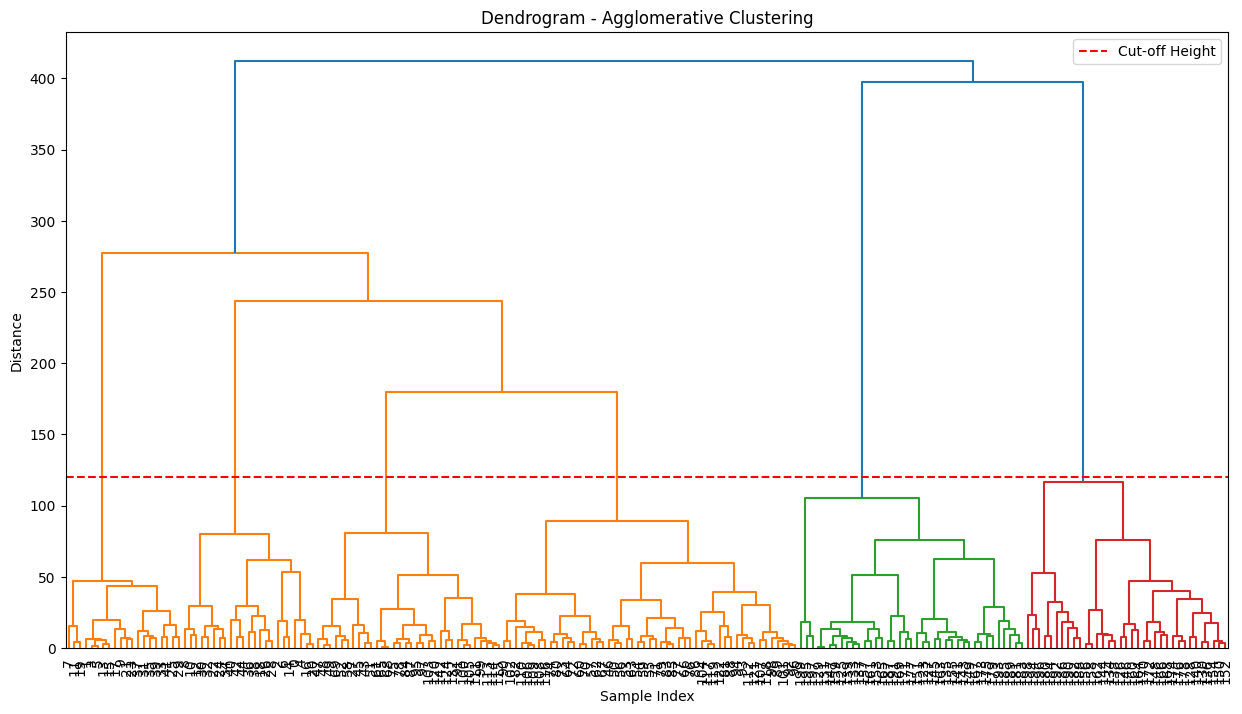

Silhouette score for Ward: 0.4428008535928764


In [38]:
# Importar as bibliotecas
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calcular as ligações hierárquicas para o modelo Agglomerative Clustering, utilizando o método ward
mergings = linkage(X, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(15, 8))
dendrogram(mergings,
           labels=df.index,  # Usar os índices do DataFrame como rótulos
           leaf_rotation=90,
           leaf_font_size=10,
           )
plt.title('Dendrogram - Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Adicionar a linha horizontal no valor de altura 100
plt.axhline(y=120, color='r', linestyle='--', label='Cut-off Height')

plt.legend()
plt.show()

# Calcular o coeficiente de silhueta para o modelo Ward
silhouette_avg_ward = silhouette_score(X, labels_ward)
print(f"Silhouette score for Ward: {silhouette_avg_ward}")


Neste modelo, parece que chegamos a 6 clusters bem definidos, com uma distância razoável entre os samples, portanto vamos fazer o slice do dendograma na altura com distância máxima de 120 entre os samples. Observamos também que temos 4 clusters com linhas de mesma cor o que indica alta similaridade entre as caracaterísticas destes clusters.

Vamos testar o modelo utilizando agora o método aditivo (complete).

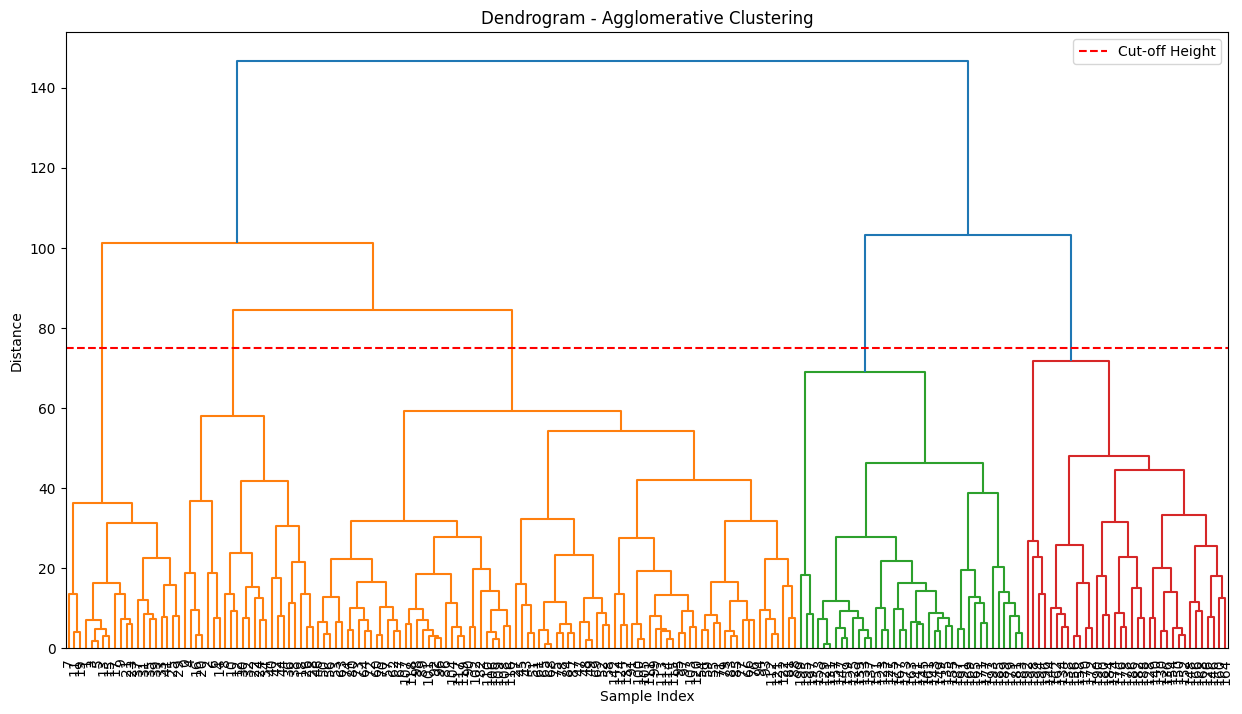

Silhouette score for Complete Linkage: 0.42326551539571566


In [39]:
# Calcular as ligações hierárquicas para o modelo Agglomerative Clustering, utilizando o método ward
mergings = linkage(X, method='complete')

# Plotar o dendrograma
plt.figure(figsize=(15, 8))
dendrogram(mergings,
           labels=df.index,  # Usar os índices do DataFrame como rótulos
           leaf_rotation=90,
           leaf_font_size=10,
           )
plt.title('Dendrogram - Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Adicionar a linha horizontal no valor de altura 100
plt.axhline(y=75, color='r', linestyle='--', label='Cut-off Height')

plt.legend()
plt.show()

# Calcular o coeficiente de silhueta para o modelo Complete Linkage
silhouette_avg_complete = silhouette_score(X, labels_complete)
print(f"Silhouette score for Complete Linkage: {silhouette_avg_complete}")

O modelo utilizando o método ward parece apresentar clusters mais bem definidos e também possui um silhouete score um pouco melhor. Por isso vamos considerar este método para realizar as análises.

Number of customers profiles - Chegamos a um total de 6 clusters, sendo 2 mais distintos e e 4 apresentando similaridade entre si.

Minority and majority customer profiles

In [43]:
# Contagem de clientes em cada cluster
cluster_counts = pd.Series(labels_ward).value_counts()

# Mostrar a quantidade de amostras em cada cluster
print("Number of samples in each cluster:")
print(cluster_counts)

# Cluster com o menor número de clientes (perfil minoritário)
minority_cluster = cluster_counts.idxmin()

# Cluster com o maior número de clientes (perfil majoritário)
majority_cluster = cluster_counts.idxmax()

df['Agg_Cluster'] = labels_ward

print(f"\nMinority customer profile (Cluster {minority_cluster}):")
print(f"\nMajority customer profile (Cluster {majority_cluster}):")



Number of samples in each cluster:
1    51
2    39
0    35
5    32
4    23
3    20
dtype: int64

Minority customer profile (Cluster 3):

Majority customer profile (Cluster 1):


Main characteristics of those customers - Para obter as principais características dos clientes em cada cluster, podemos calcular a média ou a mediana das variáveis em cada cluster

In [44]:
# Calcular as médias das variáveis para cada cluster
cluster_means = df.groupby('Agg_Cluster').mean()
print(cluster_means)

             CustomerID    Gender        Age  Annual Income (k$)  \
Agg_Cluster                                                        
0            164.428571  0.428571  41.685714           88.228571   
1             85.568627  0.588235  53.215686           55.117647   
2            162.000000  0.538462  32.692308           86.538462   
3             21.700000  0.600000  24.850000           24.950000   
4             23.000000  0.608696  45.217391           26.304348   
5             84.375000  0.625000  24.531250           54.187500   

             Spending Score (1-100)   Cluster  DBSCAN_Cluster  
Agg_Cluster                                                    
0                         17.285714  2.028571            -1.0  
1                         49.470588  3.000000            -1.0  
2                         82.128205  1.000000            -1.0  
3                         81.000000  4.000000            -1.0  
4                         20.913043  0.000000            -1.0  
5      

# Conclusão

Percebemos que existem similaridades entre o cluster 3 calculado pelo modelo k-means e o cluster 1 calculado pelo modelo Agglomerative clustering, já que o cluster 1 está totalmente contido no cluster 3. Verificamos visualmente que estes clusters não apresentam sobreposição de samples com outros clusters e possuem um número signiticativo de samples. Portanto nossa recomendação é utilizar as médias das variáveis destes clusters para embasar estratégias de marketing.